# Statevector and Visualization 

Here, we will play around a bit with how to construct state vectors and represent them. We will see that this is feasible using both `Statevector` and `StatevectorSimulator`

In [1]:
import numpy as np

from qiskit import QuantumCircuit, assemble, Aer, execute, BasicAer
from qiskit.visualization import *
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.tools.jupyter import *
from qiskit.extensions import Initialize

## Bell States

Now, we will see how to place two qubits into maximally entangled quantum states. They are called Bell States and are defined in the computational basis as

1. $ |\Phi^+\rangle = \frac{1}{\sqrt{2}}\left[| 00 \rangle +  | 11 \rangle\right]$
2. $ |\Phi^-\rangle = \frac{1}{\sqrt{2}}\left[| 00 \rangle -  | 11 \rangle\right]$
3. $ |\Psi^+\rangle = \frac{1}{\sqrt{2}}\left[| 01 \rangle +  | 10 \rangle\right]$
4. $ |\Psi^-\rangle = \frac{1}{\sqrt{2}}\left[| 01 \rangle -  | 10 \rangle\right]$

Let's see how to obtain them using Qiskit. In which case we will use a different output style for the state representation

    
<b> 1.<b> $|\Phi^+\rangle$  
    
\begin{aligned}
    |\Phi^+\rangle = \frac{1}{\sqrt{2}}\left[| 00 \rangle +  | 11 \rangle\right]
\end{aligned}
    


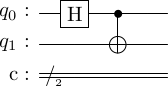

In [2]:
bell_0 = QuantumCircuit(2,2)
bell_0.h(0)
bell_0.cx(0,1)

bell_0.draw('latex')

In [3]:
#we define the basis
sv = Statevector.from_label("00")

#we evolve this initial state through our circuit
sv_bell_0 = sv.evolve(bell_0)
sv_bell_0.draw('latex')

<IPython.core.display.Latex object>

   
<b> 2.<b> $|\Phi^-\rangle$  
    
\begin{aligned}
    |\Phi^-\rangle = \frac{1}{\sqrt{2}}\left[| 00 \rangle -  | 11 \rangle\right]
\end{aligned}
    


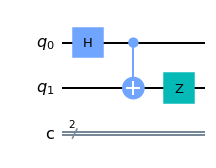

In [4]:
bell_1 = QuantumCircuit(2,2)
bell_1.h(0)
bell_1.cx(0,1)
bell_1.z(1)

#mpl = matplotlib
#latex_source also possible, but really hard to see what is going on
bell_1.draw('mpl')

In [5]:
sv_bell_1 = sv.evolve(bell_1)
sv_bell_1.draw('latex_source')

'\\frac{\\sqrt{2}}{2} |00\\rangle- \\frac{\\sqrt{2}}{2} |11\\rangle'

    
<b> 3.<b> $|\Psi^+\rangle$  
    
\begin{aligned}
     |\Psi^+\rangle = \frac{1}{\sqrt{2}}\left[| 01 \rangle +  | 10 \rangle\right]
\end{aligned}
    


In [6]:
bell_2 = QuantumCircuit(2,2)
bell_2.h(0)
bell_2.x(1)
bell_2.cx(0,1)

bell_2.draw('text') 

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
c: 2/══════════

In [7]:
sv_bell_2 = sv.evolve(bell_2)
sv_bell_2.draw('text') #text by default

[0.        +0.j,0.70710678+0.j,0.70710678+0.j,0.        +0.j]

    
<b> 4.<b> $|\Psi^-\rangle$  
    
\begin{aligned}
     |\Psi^-\rangle = \frac{1}{\sqrt{2}}\left[| 01 \rangle -  | 10 \rangle\right]
\end{aligned}
    


In [8]:
bell_3 = QuantumCircuit(2,2)
bell_3.h(0)
bell_3.x(1)
bell_3.cx(0,1)
bell_3.z(1)

bell_3.draw() #text by default

┌───┐          
q_0: ┤ H ├──■───────
     ├───┤┌─┴─┐┌───┐
q_1: ┤ X ├┤ X ├┤ Z ├
     └───┘└───┘└───┘
c: 2/═══════════════

In [9]:
sv_bell_3 = sv.evolve(bell_3)
sv_bell_3.draw()

'Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,\n              0.        +0.j],\n            dims=(2, 2))'

## GHZ state

Bell states can be generalized to certain quantum states of multi-qubit systems, such as the GHZ (Greenberger–Horne–Zeilinger) state for 3 or more subsystems. For 3 qubits the GHZ state is

\begin{aligned}
|\psi^{GHZ}\rangle = \frac{1}{\sqrt{2}}\left[| 000 \rangle +  | 111 \rangle\right]
\end{aligned}

To draw this state in Qiskit, we use the following circuit

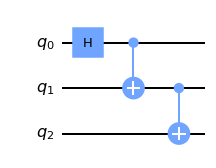

In [10]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)

ghz.draw('mpl')

In [11]:
### drawing the statevector
sv_ghz= Statevector.from_label("000")
state_ghz = sv_ghz.evolve(ghz)
state_ghz.draw('latex')

<IPython.core.display.Latex object>

## Visualization of the Bell states 

We use some of the plot options applied to the bell states above. They are: 

1. `plot_state_qsphere`: https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html
2. `plot_state_hinton`: https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_hinton.html
3. `plot_state_paulivec`:https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_paulivec.html
4. `plot_state_city`: https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_paulivec.html
5. `plot_bloch_multivector`:https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html

<b> 1. plot_state_qsphere <b>
    
Plot the qsphere representation of a quantum state. Here, the size of the points is proportional to the probability of the corresponding term in the state and the color represents the phase.

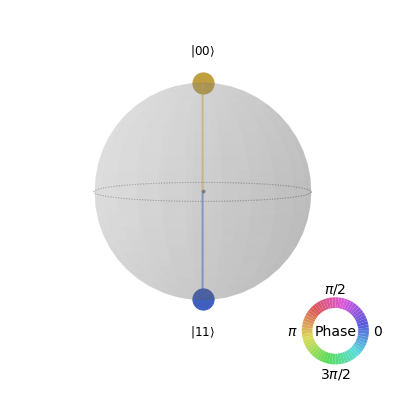

In [12]:
plot_state_qsphere(bell_1)

<b> 2. plot_state_hinton <b>
    
Plot a hinton diagram for the density matrix of a quantum state.

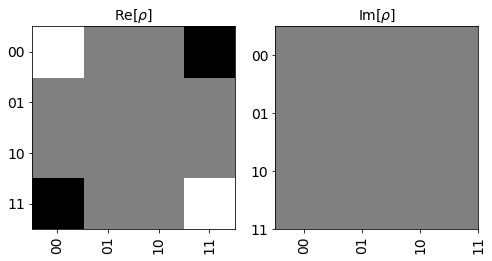

In [13]:
plot_state_hinton(bell_1)

<b> 3. plot_state_paulivec <b>
    
Plot the paulivec representation of a quantum state, which is a bargraph of the mixed state rho over the pauli matrices

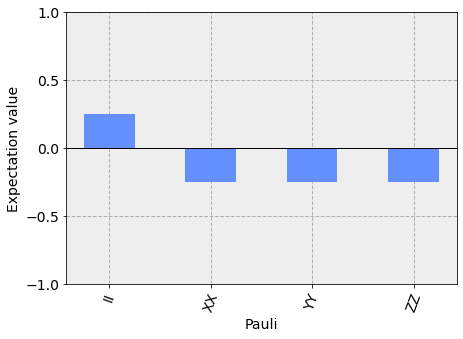

In [14]:
plot_state_paulivec(bell_3)

<b> 4. plot_state_city <b>
    
Plot the cityscape of quantum state, which is a two 3d bar graphs (two dimensional) of the real and imaginary part of the density matrix rho.

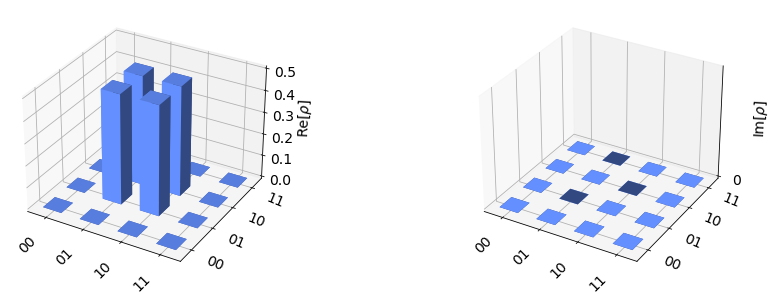

In [15]:
plot_state_city(bell_2) 

<b> 5. plot_bloch_multivector <b>
    
Plot the Bloch sphere, which is a sphere, axes, the Bloch vector, and its projections onto each axis. Note, this kind of plot is only possible if we have a separable state. Bell states are not, so...

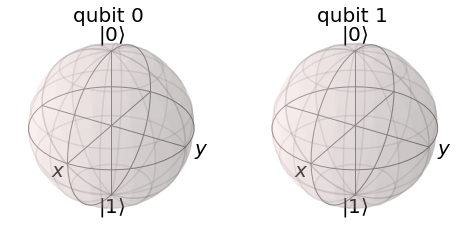

In [16]:
plot_bloch_multivector(bell_2)

# It is not a separable state!!

Error! Note, however, that for a separable state it works perfectly

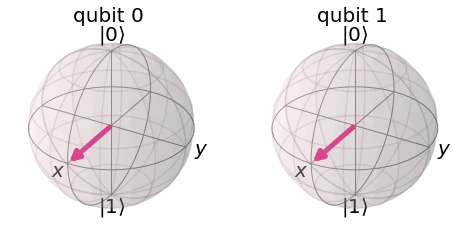

In [17]:
ex_sep_state = QuantumCircuit(2)
ex_sep_state.h(0)
ex_sep_state.h(1)

ex_sv = Statevector.from_label("00")
ex_state = ex_sv.evolve(ex_sep_state)
plot_bloch_multivector(ex_state)

Also, we can plot a single plot_bloch_vector only by specifying the coordinates

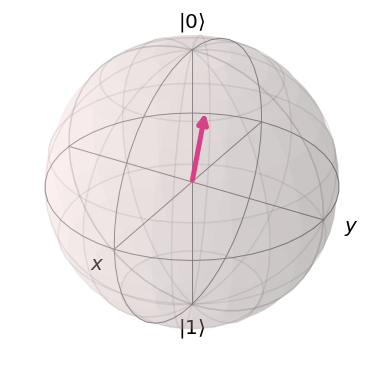

In [18]:
plot_bloch_vector([0.7,0.5,1]) #here for [x,y,z]; x=Tr[Xρ] and similar for y and z

## Creating states with Statevector_simulator and  Aer_simulator

For both cases we will use the following _step-by-step_ approach:

1. we define a quantum circuit `qc`
2. creating object given qc : `qobj= assemble(qc)`
3. define a backend (we are telling Qiskit how to simulate our circuit)
4. we run qobj given a backend result and we get the results: `backend.run(qobj).result()`
5. we get the statevector: `get_statevector()`

<b> 1.  Aer_simulator <b>

In [19]:
###Part1: circuit part
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

#it saves the current simulator quantum state as a statevector.
qc.save_statevector()  

###Parts 2 and 3 using Aer_simulator
qobj = assemble(qc)     
backend1 = Aer.get_backend('aer_simulator') 

###Parts 4 and 5
result = backend1.run(qobj).result()
sv_qc0 = result.get_statevector()
sv_qc0.draw('latex')

<IPython.core.display.Latex object>

With this simulator we can also plot the quantum state

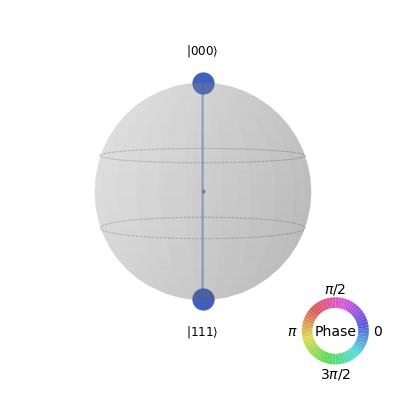

In [20]:
sv_qc0.draw('qsphere')

<b> 2. statevetor_simulator <b>


In [21]:
######## PART2: statevetor_simulator

###Part1: circuit part

qc1 = QuantumCircuit(3)
qc1.h(0)
qc1.cx(0,1)
qc1.cx(1,2)

### backend part

backend2 = BasicAer.get_backend('statevector_simulator') 

### result part

# by default shots = 1024
job = execute(qc1, backend2, shots=1024) 
result = job.result()

#finally, we get the statevector from the result
sv_qc1 = result.get_statevector(qc1)

However, this procedure does not allow us to get the state by applying the method '.draw()' 

In [22]:
sv_qc1.draw('qsphere')

AttributeError: 'numpy.ndarray' object has no attribute 'draw'

On the other hand, it works by plotting direcly

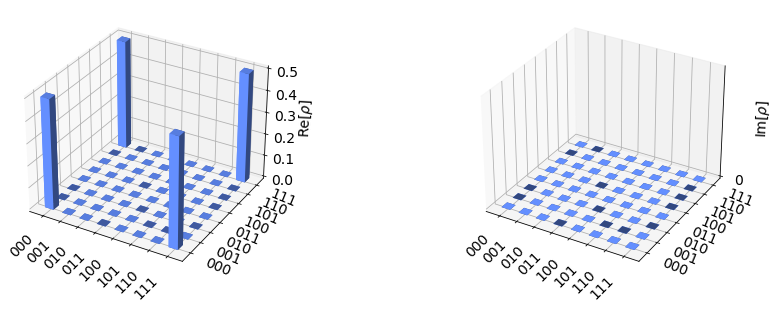

In [23]:
plot_state_city(sv_qc1)

## Generating random and custom states

<b> 1. custom state <b>
    
We can define a state manually and also incorporate it into a circuit

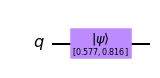

In [24]:
N = 1/np.sqrt(3)
desired_state = [N,np.sqrt(1-N**2)]

#adding it to a circuit
qc_custom0 = QuantumCircuit(1)
qc_custom0.initialize(desired_state,0) #as simple as this!
qc_custom0.draw('mpl')

Just double checking, we will perfom some measurments and then we will check if the ouput is correct

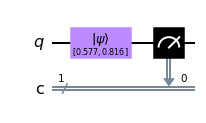

In [25]:
meas = QuantumCircuit(1,1)
meas.measure(0,0)

#we add, through the composite function, the measurement to the custom state
qc_custom = meas.compose(qc_custom0, front=True)
qc_custom.draw('mpl')

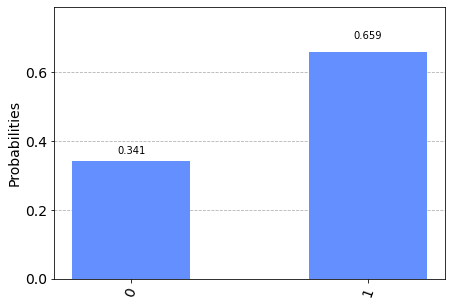

In [26]:
#To get histograms, we use qasm_simulator. 
#We will see this in the notebook qasm_simulator_and_visualization.ipynb
backend_qasm = BasicAer.get_backend('qasm_simulator')

job0 = execute(qc_custom, backend_qasm, shots=1000)
counts = job0.result().get_counts()
plot_histogram(counts)

Even though the ouput varies a bit due to the noise in those simulators, it seems alright!

<b> 2. random state <b>
    
Also a random state can be incorporated into a circuit

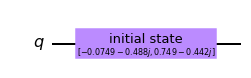

In [27]:
# random_statevector of dimension 2
psi = random_statevector(2)

#Initialize qubits in a specific state.
init_gate = Initialize(psi)

# defining a name to the state. By default is |psi\rangle
init_gate.label = "initial state"

qc_random = QuantumCircuit(1)

# random state for the first qibit
qc_random.append(init_gate, [0])

qc_random.draw('mpl')

Another way to perform measurements: `measure_all()`. In fact, if no classical bit is defined in the qc, that is the only way possible

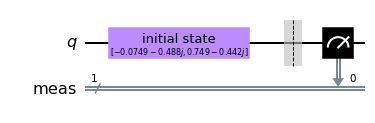

In [28]:
qc_random.measure_all()
qc_random.draw('mpl')

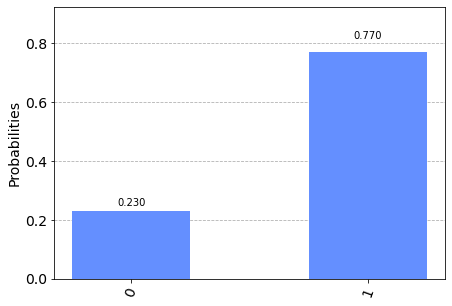

In [29]:
job1 = execute(qc_random, backend_qasm, shots=1000)
counts1 = job1.result().get_counts()
plot_histogram(counts1)

### Decomposing a state

A state is decompose by applying: `qc.decompose()`. We will apply it on the circuit `qc_custom0`

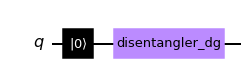

In [30]:
decomp = qc_custom0.decompose()
decomp.draw('mpl')